In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble, linear_model, tree
from sklearn import model_selection

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
combined = train.append(test)

Comparison of total survived to toal not survived

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

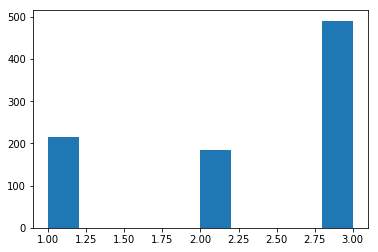

In [6]:
plt.hist(train['Pclass'], label=train['Survived'])

In [7]:
survived_fare = train[train['Survived']==1]['Fare']
not_survived_fare = train[train['Survived']==0]['Fare']

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

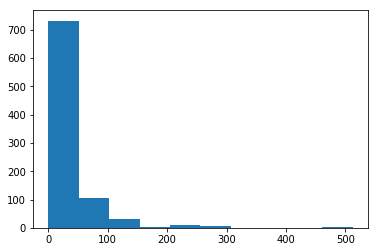

In [8]:
plt.hist(train['Fare'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

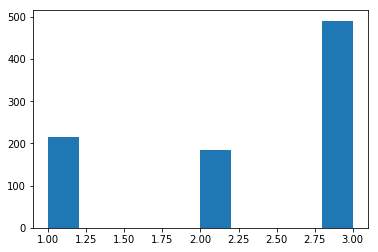

In [10]:
plt.hist(train['Pclass'])

In [11]:
useless_features = ['PassengerId', 'Ticket', 'Cabin'] # imo Name tez do wywalenia!

In [12]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [13]:
combined.drop(useless_features, axis=1, inplace=True)

In [14]:
combined['Title'] = combined['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [15]:
title_names = (combined['Title'].value_counts() < 10)

In [16]:
combined['Title'] = combined['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [17]:
combined['Age'].fillna(combined['Age'].median(), inplace=True)

In [18]:
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [19]:
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)

In [20]:
combined['Family_size'] = combined['SibSp'] + combined['Parch']
combined['IsAlone'] = 0

In [21]:
combined.loc[combined['Family_size'] >= 1, 'IsAlone'] = 1

In [22]:
combined['FareBin'] = pd.qcut(combined['Fare'], 4)
combined['AgeBin'] = pd.qcut(combined['Age'].astype(int), 4)

In [23]:
combined.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Title,Family_size,IsAlone,FareBin,AgeBin
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,Mr,1,1,"(-0.001, 7.896]","(-0.001, 22.0]"
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,Mrs,1,1,"(31.275, 512.329]","(35.0, 80.0]"
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,Miss,0,0,"(7.896, 14.454]","(22.0, 28.0]"
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,Mrs,1,1,"(31.275, 512.329]","(28.0, 35.0]"
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,Mr,0,0,"(7.896, 14.454]","(28.0, 35.0]"


In [54]:
combined.isnull().sum()

Age                0
Embarked           0
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived         418
Title              0
Family_size        0
IsAlone            0
FareBin            0
AgeBin             0
Sex_Code           0
Fare_Code          0
Age_Code           0
Embarked_Code      0
Title_Code         0
dtype: int64

Convert categorical data to dummy variables for mathematical analysis

In [24]:
le = LabelEncoder()

In [25]:
combined['Sex_Code'] = le.fit_transform(combined['Sex'])
combined['Fare_Code'] = le.fit_transform(combined['FareBin'])
combined['Age_Code'] = le.fit_transform(combined['AgeBin'])
combined['Embarked_Code'] = le.fit_transform(combined['Embarked'])
combined['Title_Code'] = le.fit_transform(combined['Title'])

In [26]:
combined

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Title,Family_size,IsAlone,FareBin,AgeBin,Sex_Code,Fare_Code,Age_Code,Embarked_Code,Title_Code
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,Mr,1,1,"(-0.001, 7.896]","(-0.001, 22.0]",1,0,0,2,3
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,Mrs,1,1,"(31.275, 512.329]","(35.0, 80.0]",0,3,3,0,4
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,Miss,0,0,"(7.896, 14.454]","(22.0, 28.0]",0,1,1,2,2
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,Mrs,1,1,"(31.275, 512.329]","(28.0, 35.0]",0,3,2,2,4
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,Mr,0,0,"(7.896, 14.454]","(28.0, 35.0]",1,1,2,2,3
5,28.0,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,Mr,0,0,"(7.896, 14.454]","(22.0, 28.0]",1,1,1,1,3
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,Mr,0,0,"(31.275, 512.329]","(35.0, 80.0]",1,3,3,2,3
7,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,Master,4,1,"(14.454, 31.275]","(-0.001, 22.0]",1,2,0,2,0
8,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,Mrs,2,1,"(7.896, 14.454]","(22.0, 28.0]",0,1,1,2,4
9,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1.0,Mrs,1,1,"(14.454, 31.275]","(-0.001, 22.0]",0,2,0,0,4


In [27]:
Target = ['Survived']

In [28]:
data_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']

In [29]:
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'Family_size', 'IsAlone']

In [30]:
combined_dummy = pd.get_dummies(combined[data1_x])

In [31]:
combined_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,1,1,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,0,0,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,1,1,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,0,1,0


In [32]:
combined.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_size,IsAlone,Sex_Code,Fare_Code,Age_Code,Embarked_Code,Title_Code
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,33.295479,0.385027,2.294882,0.498854,0.383838,0.883881,0.396486,0.644003,1.488159,1.378151,1.493506,2.760122
std,12.905241,51.738879,0.865560,0.837836,1.041658,0.486592,1.583639,0.489354,0.478997,1.122833,1.112830,0.814244,0.903052
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000
75%,35.000000,31.275000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000,10.000000,1.000000,1.000000,3.000000,3.000000,2.000000,4.000000


Exploratory Data Analysis

In [33]:
combined2 = combined.drop(columns=['Embarked', 'Age', 'Sex', 'Fare', 'Title', 'Name', 'FareBin', 'AgeBin'])
train_data = combined2[~combined['Survived'].isnull()]
test_data = combined2[combined['Survived'].isnull()]
train_y_data = train_data[['Survived']]
train_x_data = train_data.drop(columns='Survived')

In [34]:
train_data.head()

,Parch,Pclass,SibSp,Survived,Family_size,IsAlone,Sex_Code,Fare_Code,Age_Code,Embarked_Code,Title_Code
0,0,3,1,0.0,1,1,1,0,0,2,3
1,0,1,1,1.0,1,1,0,3,3,0,4
2,0,3,0,1.0,0,0,0,1,1,2,2
3,0,1,1,1.0,1,1,0,3,2,2,4
4,0,3,0,0.0,0,0,1,1,2,2,3


In [35]:
target = ['Survived']

In [36]:
train_data[['SibSp', target[0]]].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [37]:
train_data.head()

,Parch,Pclass,SibSp,Survived,Family_size,IsAlone,Sex_Code,Fare_Code,Age_Code,Embarked_Code,Title_Code
0,0,3,1,0.0,1,1,1,0,0,2,3
1,0,1,1,1.0,1,1,0,3,3,0,4
2,0,3,0,1.0,0,0,0,1,1,2,2
3,0,1,1,1.0,1,1,0,3,2,2,4
4,0,3,0,0.0,0,0,1,1,2,2,3


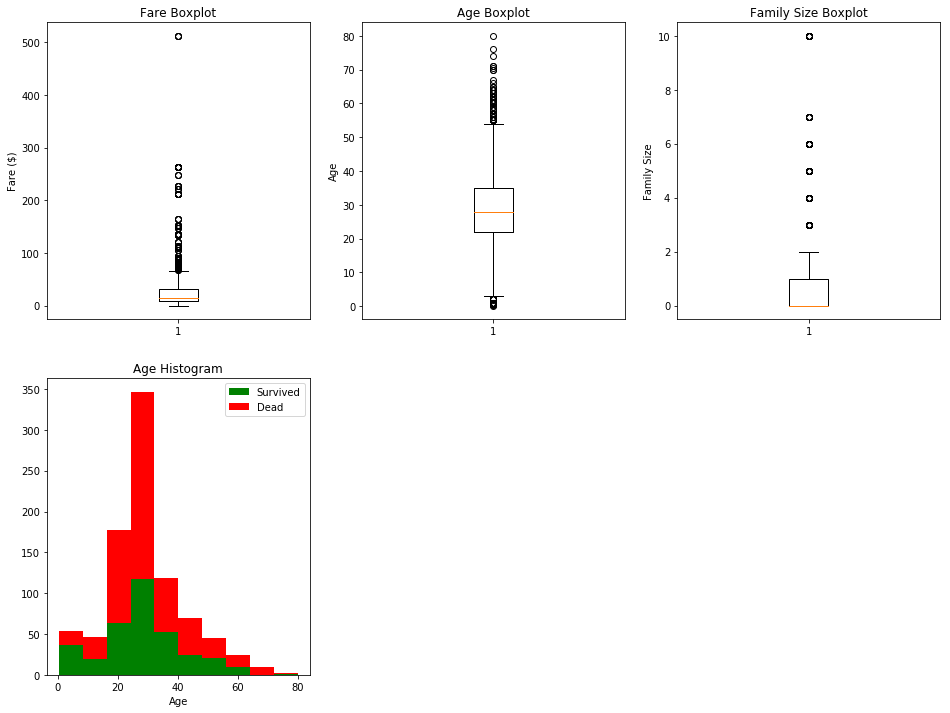

In [57]:
plt.figure(figsize=(16,12))

plt.subplot(231)
plt.boxplot(combined['Fare'])
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(combined['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(combined['Family_size'])
plt.title('Family Size Boxplot')
plt.ylabel('Family Size')

plt.subplot(234)
plt.hist(x = [combined[combined['Survived']==1]['Age'], combined[combined['Survived']==0]['Age']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram')
plt.xlabel('Age')
plt.legend();

Let's create a model finally!!

In [39]:
MLAs = [ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), tree.DecisionTreeClassifier()]

In [40]:
cross_val_results = model_selection.cross_validate(MLAs[0], train_x_data, train_y_data, cv=5)

In [41]:
cross_val_results

{'fit_time': array([0.023     , 0.023     , 0.02100015, 0.02200007, 0.02200007]),
 'score_time': array([0.00300002, 0.00199986, 0.00199986, 0.00099993, 0.00099993]),
 'test_score': array([0.77653631, 0.79329609, 0.78089888, 0.7752809 , 0.79096045]),
 'train_score': array([0.89747191, 0.9002809 , 0.89340813, 0.89621318, 0.88795518])}

In [42]:
y_pred1 = model_selection.cross_val_predict(MLAs[0], train_x_data, train_y_data, cv=5)
# Co on tutaj predukuje?????????

In [43]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(train_x_data, train_y_data)

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((668, 10), (223, 10), (668, 1), (223, 1))

In [45]:
cross_val_res2 = model_selection.cross_validate(MLAs[0], X_train, Y_train)

In [46]:
cross_val_res2

{'fit_time': array([0.02699995, 0.02499986, 0.0250001 ]),
 'score_time': array([0.00300002, 0.00200009, 0.00300002]),
 'test_score': array([0.78475336, 0.73542601, 0.78828829]),
 'train_score': array([0.90337079, 0.90786517, 0.89686099])}

In [47]:
#Y_pred = model_selection.cross_val_predict(MLAs[0], X_test)
rf_classifier = MLAs[0].fit(X_train, Y_train)

In [48]:
Y_pred = rf_classifier.predict(X_test)

In [49]:
type(Y_pred)
Y_test_array = np.array(Y_test)
(Y_pred).shape, (Y_test_array).shape

((223L,), (223L, 1L))

In [50]:
Y_test['Survived_Predicted'] = Y_pred

In [51]:
Y_test['Predicted Right'] = Y_pred == Y_test_array[:,0]

In [52]:
cases_predicted_correct = 0
Y_test['Predicted Right'].sum()/len(Y_test)

0

In [53]:
Y_pred

array([0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1.])